# This notebook is created As a part of my internship program , provided by BharatIntern.


    Im assigned to a task 

Task = **House Price Prediction :
Machine Learning model to predict house
price using linear regression only
Jupyter notebook code..**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing_data=pd.read_csv("E:\kaggle dataset/housing.csv")


In [441]:
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Notice that the total_bed
rooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing
this feature. We will need to take care of this later**

In [443]:
# All attributes are numerical, except the ocean_proximity field. Its type is object, so it
# could hold any kind of Python object.
print("the total number of different values are: ",housing_data["ocean_proximity"].unique())
print("no of times weach value is repeated: \n"  , housing_data["ocean_proximity"].value_counts())

the total number of different values are:  ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
no of times weach value is repeated: 
 <1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


**Let’s look at the other fields. The describe() method shows a summary of the
numerical attributes**

In [4]:
housing_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

    Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).

In [5]:
housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

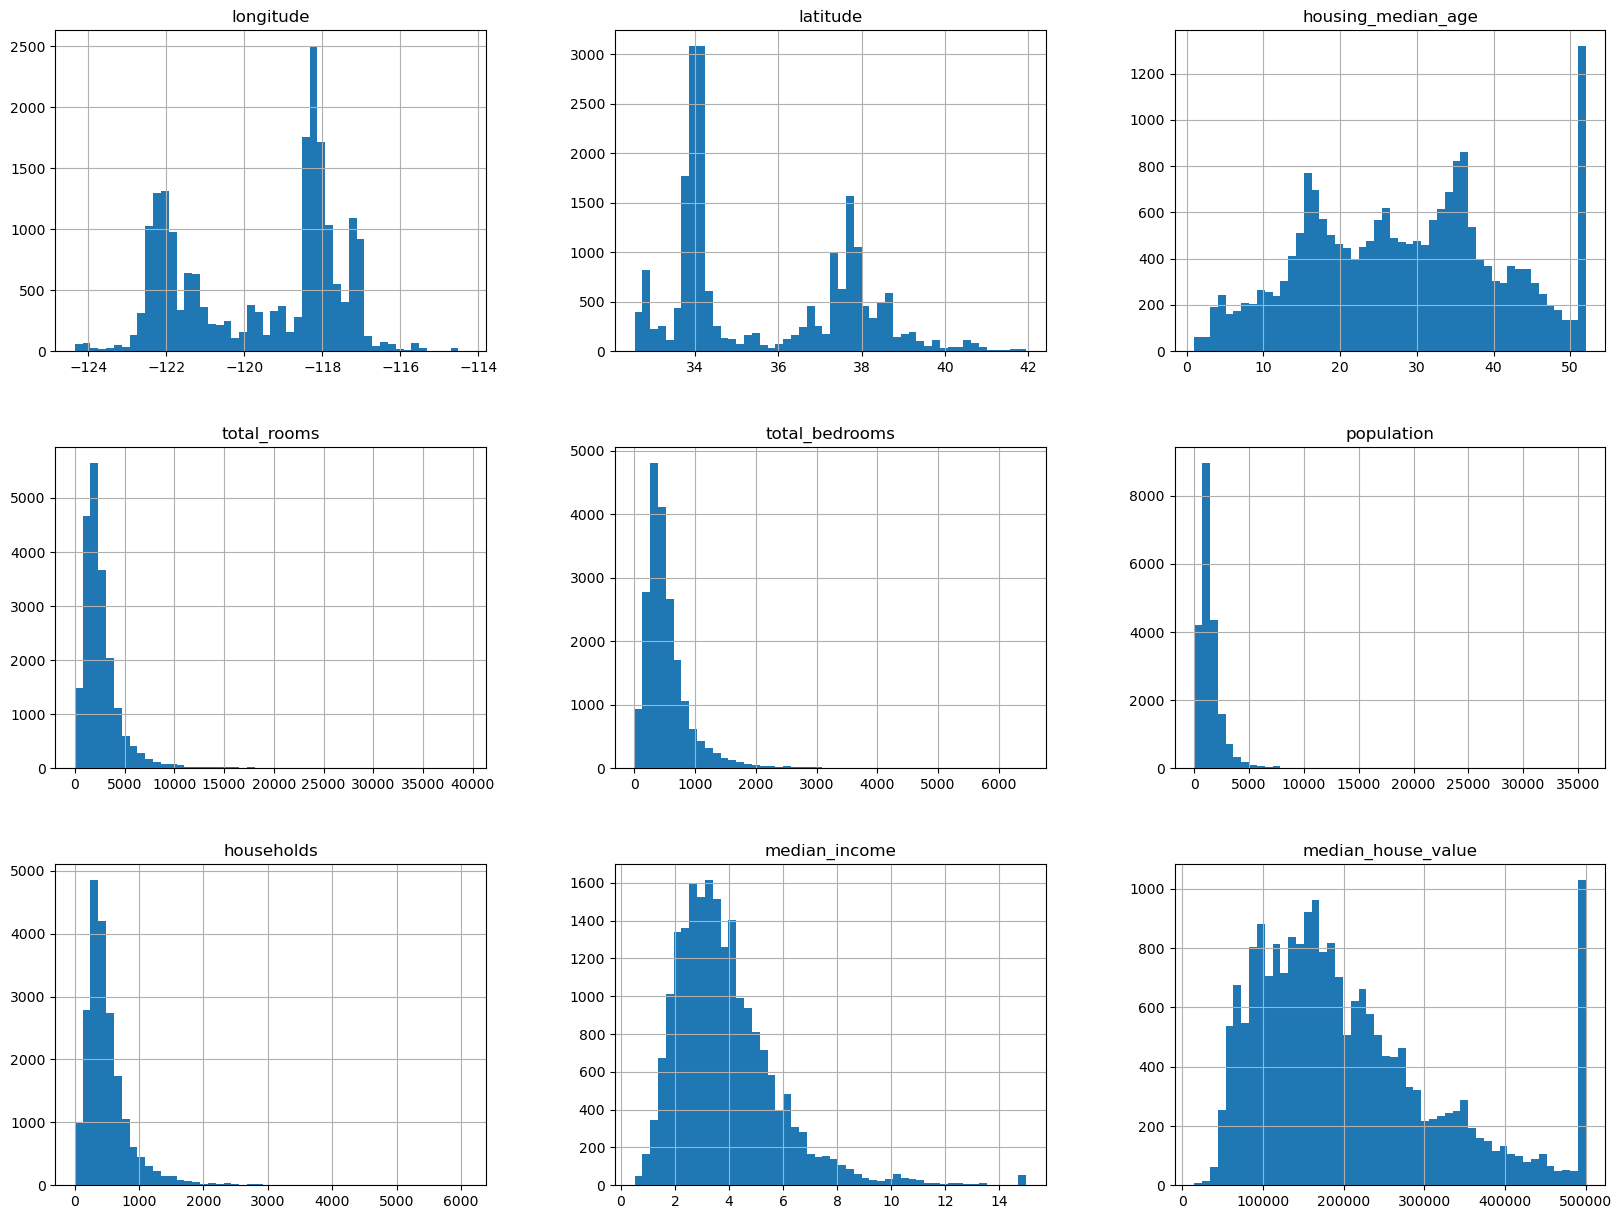

In [446]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15)) # By setting bins=50, the dataset will be divided into 50 equal-width intervals, means whole graph has 50 tops
plt.show()

<h1>Create a Test Set</h1>

In [6]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing_data, test_size=0.2, random_state=0)


In [7]:
print(train_set.size)
print(test_set.size)


165120
41280


In [8]:
# AS income is important aspect and it is continues value it can decline accuracy so ,, we need to create a category attribute based on the median income.
housing_data["income_cat"] = pd.cut(housing_data["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])


     pd.cut() is a pandas function used to divide a numerical column into categories or bins.

     The second argument, bins=[0., 1.5, 3.0, 4.5, 6., np.inf], defines the bin ranges or intervals for categorization.
     
         Values from 0 up to 1.5 will be in the first bin (category 1).
         Values from 1.5 up to 3.0 will be in the second bin (category 2).
         Values from 3.0 up to 4.5 will be in the third bin (category 3).
         Values from 4.5 up to 6.0 will be in the fourth bin (category 4).
         Values greater than or equal to 6.0 will be in the fifth bin (category 5).
     The labels=[1, 2, 3, 4, 5] argument assigns labels to each category.
     
         The first bin (category 1) will be labeled as 1.
         The second bin (category 2) will be labeled as 2.
         The third bin (category 3) will be labeled as 3.
         The fourth bin (category 4) will be labeled as 4.
         The fifth bin (category 5) will be labeled as 5.
     The result of pd.cut() is a new categorical column representing the income category for each corresponding median income value.


<Axes: >

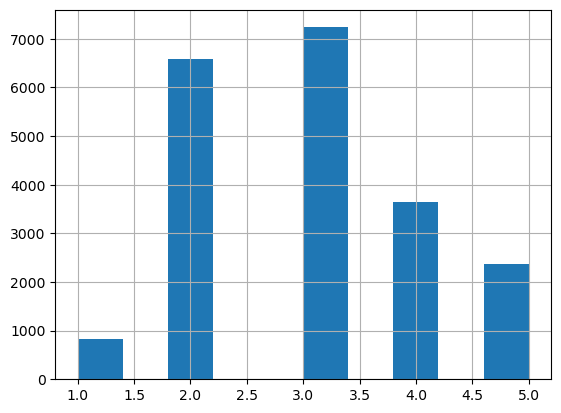

In [9]:
housing_data["income_cat"].hist()

***stratified sampling***


***when working with datasets that are not large enough or when there is a risk of introducing sampling bias.
 By using stratified sampling, researchers and analysts can obtain more reliable and unbiased results from their data analysis.***

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]): #(housing_data, housing_data["income_cat"]) this means the splitting is done on housing_data and on the basis of housing_data["income_cat"]    
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]

    

In [13]:
housing_data.head(20)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0     -122.23     37.88                41.0        880.0           129.0   
1     -122.22     37.86                21.0       7099.0          1106.0   
2     -122.24     37.85                52.0       1467.0           190.0   
3     -122.25     37.85                52.0       1274.0           235.0   
4     -122.25     37.85                52.0       1627.0           280.0   
5     -122.25     37.85                52.0        919.0           213.0   
6     -122.25     37.84                52.0       2535.0           489.0   
7     -122.25     37.84                52.0       3104.0           687.0   
8     -122.26     37.84                42.0       2555.0           665.0   
9     -122.25     37.84                52.0       3549.0           707.0   
10    -122.26     37.85                52.0       2202.0           434.0   
11    -122.26     37.85                52.0       3503.0           752.0   
12    -122.26     37.85                52.0       2491.0           474.0   
13    -122.26     37.84                52.0        696.0           191.0   
14    -122.26     37.85                52.0       2643.0           626.0   
15    -122.26     37.85                50.0       1120.0           283.0   
16    -122.27     37.85                52.0       1966.0           347.0   
17    -122.27     37.85                52.0       1228.0           293.0   
18    -122.26     37.84                50.0       2239.0           455.0   
19    -122.27     37.84                52.0       1503.0           298.0   

    population  households  median_income  median_house_value ocean_proximity  \
0        322.0       126.0         8.3252            452600.0        NEAR BAY   
1       2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2        496.0       177.0         7.2574            352100.0        NEAR BAY   
3        558.0       219.0         5.6431            341300.0        NEAR BAY   
4        565.0       259.0         3.8462            342200.0        NEAR BAY   
5        413.0       193.0         4.0368            269700.0        NEAR BAY   
6       1094.0       514.0         3.6591            299200.0        NEAR BAY   
7       1157.0       647.0         3.1200            241400.0        NEAR BAY   
8       1206.0       595.0         2.0804            226700.0        NEAR BAY   
9       1551.0       714.0         3.6912            261100.0        NEAR BAY   
10       910.0       402.0         3.2031            281500.0        NEAR BAY   
11      1504.0       734.0         3.2705            241800.0        NEAR BAY   
12      1098.0       468.0         3.0750            213500.0        NEAR BAY   
13       345.0       174.0         2.6736            191300.0        NEAR BAY   
14      1212.0       620.0         1.9167            159200.0        NEAR BAY   
15       697.0       264.0         2.1250            140000.0        NEAR BAY   
16       793.0       331.0         2.7750            152500.0        NEAR BAY   
17       648.0       303.0         2.1202            155500.0        NEAR BAY   
18       990.0       419.0         1.9911            158700.0        NEAR BAY   
19       690.0       275.0         2.6033            162900.0        NEAR BAY   

   income_cat  
0           5  
1           5  
2           5  
3           4  
4           3  
5           3  
6           3  
7           3  
8           2  
9           3  
10          3  
11          3  
12          3  
13          2  
14          2  
15          2  
16          2  
17          2  
18          2  
19          2

In [17]:
strat_train_set.sample(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2324    -119.73     36.83                14.0       3348.0           491.0   
4444    -118.22     34.07                35.0       1504.0           477.0   

      population  households  median_income  median_house_value  \
2324      1584.0       493.0         5.0828            111400.0   
4444      2059.0       498.0         2.0133            145800.0   

     ocean_proximity income_cat  
2324          INLAND          4  
4444       <1H OCEAN          2

In [18]:
strat_test_set.sample(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
6479    -118.04     34.08                35.0       1148.0           258.0   
9035    -117.84     34.63                 5.0       6739.0          1251.0   

      population  households  median_income  median_house_value  \
6479       975.0       253.0          4.037            173300.0   
9035      4614.0      1266.0          4.002            115100.0   

     ocean_proximity income_cat  
6479       <1H OCEAN          3  
9035          INLAND          3

In [ ]:
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [19]:
strat_test_set["income_cat"].value_counts(ascending=False)

income_cat
3    1447
2    1316
4     728
5     472
1     165
Name: count, dtype: int64

In [20]:
# Now you should remove the income_cat attribute so the data is back to its original
# state:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)


In [21]:
housing_data = strat_train_set.copy()

In [458]:
housing_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  median_house_value  \
12655      2237.0       706.0         2.1736             72100.0   
15502      2015.0       768.0         6.3373            279600.0   
2908        667.0       300.0         2.8750             82700.0   
14053       898.0       483.0         2.2264            112500.0   
20496      1837.0       580.0         4.4964            238300.0   
...           ...         ...            ...                 ...   
15174      2026.0      1001.0         5.0900            268500.0   
12661      4769.0      1418.0         2.8139             90400.0   
19263       458.0       172.0         3.1797            140400.0   
19140      1208.0       501.0         4.1964            258100.0   
19773       625.0       197.0         3.1319             62700.0   

      ocean_proximity  
12655          INLAND  
15502      NEAR OCEAN  
2908           INLAND  
14053      NEAR OCEAN  
20496       <1H OCEAN  
...               ...  
15174       <1H OCEAN  
12661          INLAND  
19263       <1H OCEAN  
19140       <1H OCEAN  
19773          INLAND  

[16512 rows x 10 columns]

<h1>Discover and Visualize the Data to Gain Insights</h1>

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

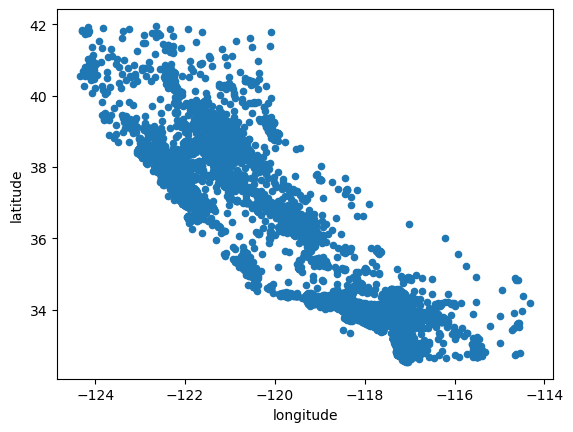

In [459]:
# plt.scatter(housing_data.longitude,housing_data.latitude)
housing_data.plot(kind="scatter",x="longitude",y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

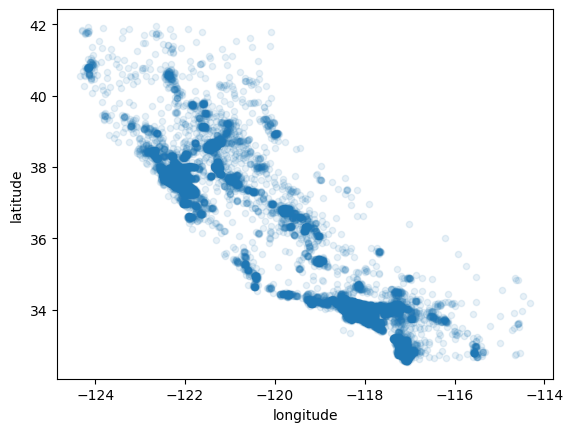

In [460]:
# but other than that it is hard to see any particular
# pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
# where there is a high density of data points
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


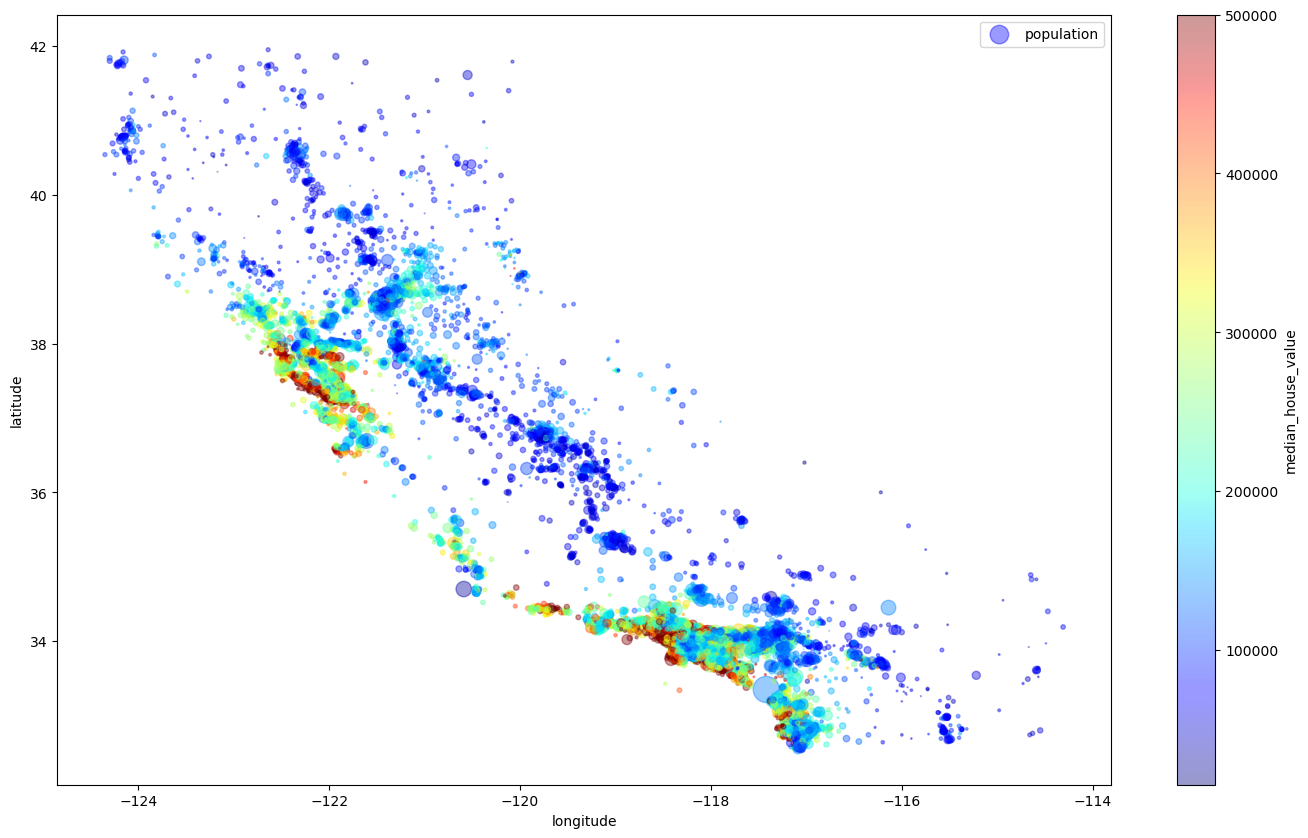

In [461]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(17,10),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

**California housing prices: red is expensive, blue is cheap, larger circles indi‐
cate areas with a larger population**

 ***the `radius of each circle` represents
the `district’s population` (option s), and the `color represents the price` (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices):***

<h2>Looking for Correlations</h2>

Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method

In [462]:
corr_matrix = housing_data.corr() # The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

***The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to 0 mean that there is no
linear correlation***

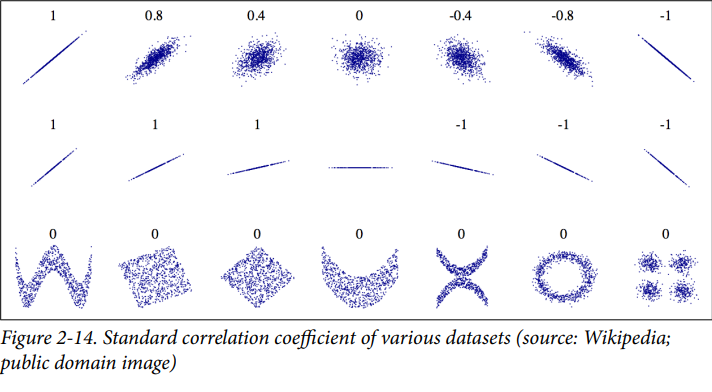


***Another way to check for correlation between attributes is to use the `pandas
scatter_matrix() function`,***

which plots every numerical attribute against every
other numerical attribute. Since there are now 9 numerical attributes, you would get
81 plots, 

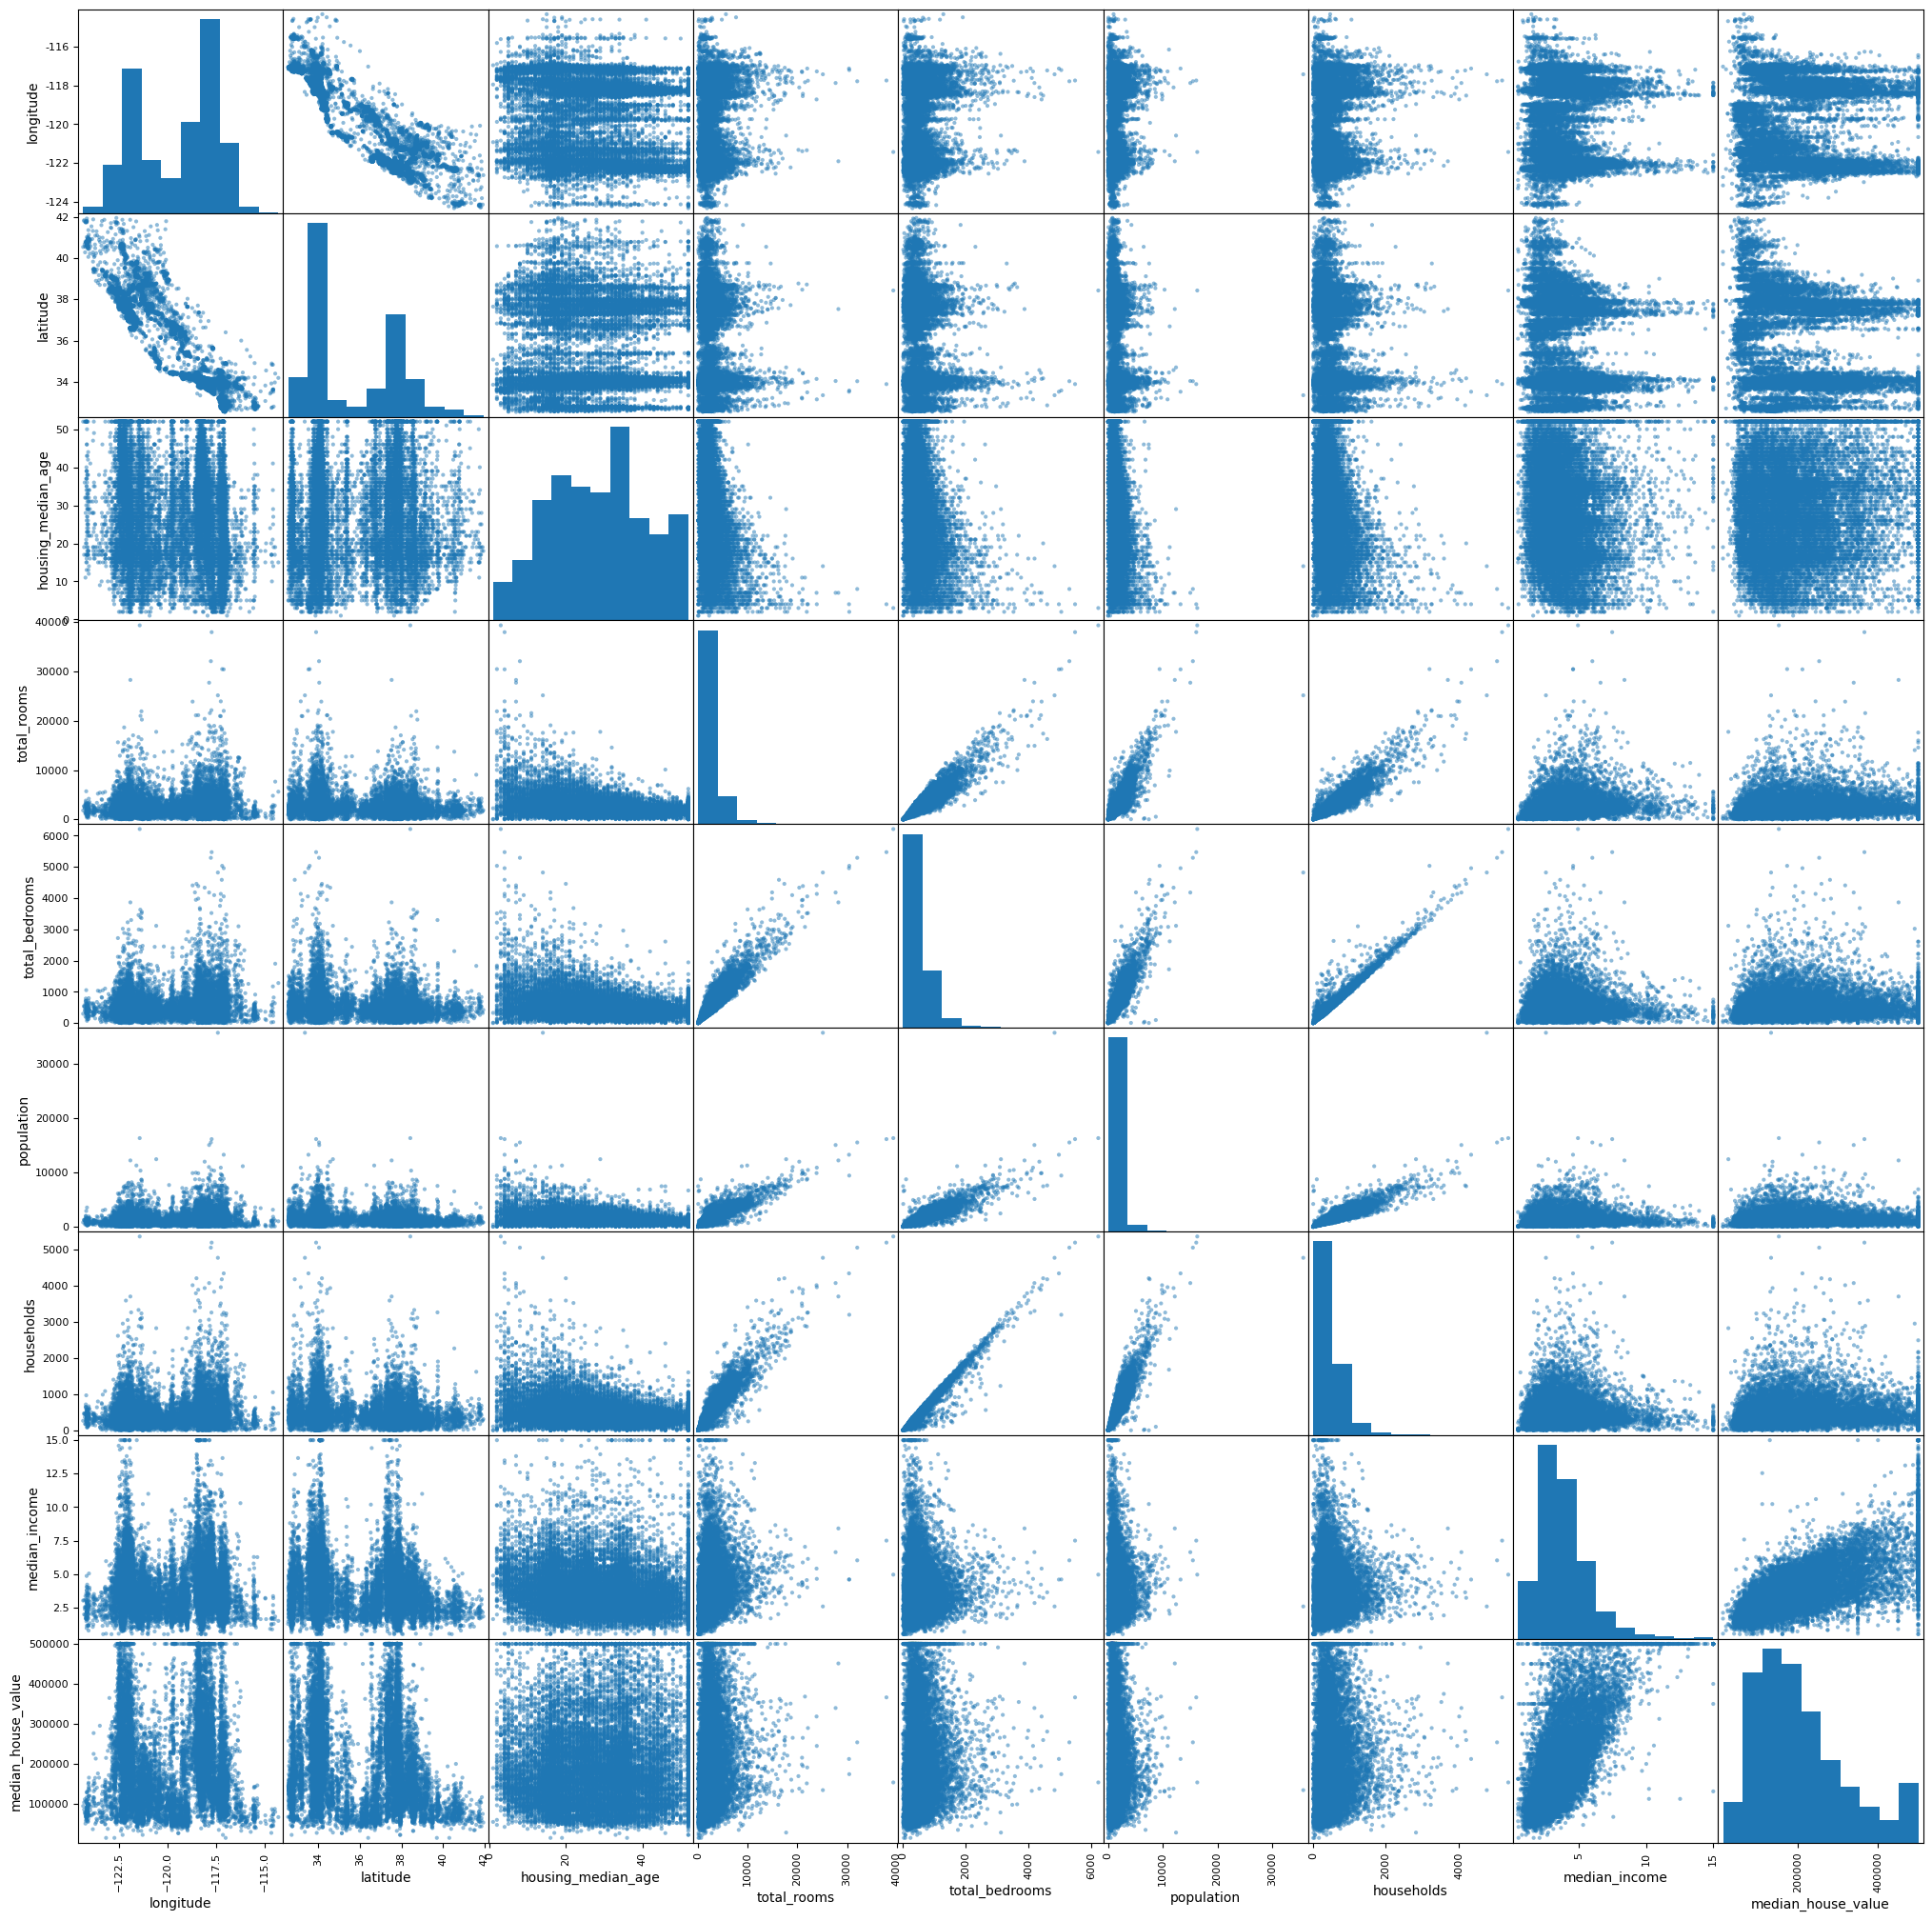

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing_data, figsize=(25, 25))
plt.show()

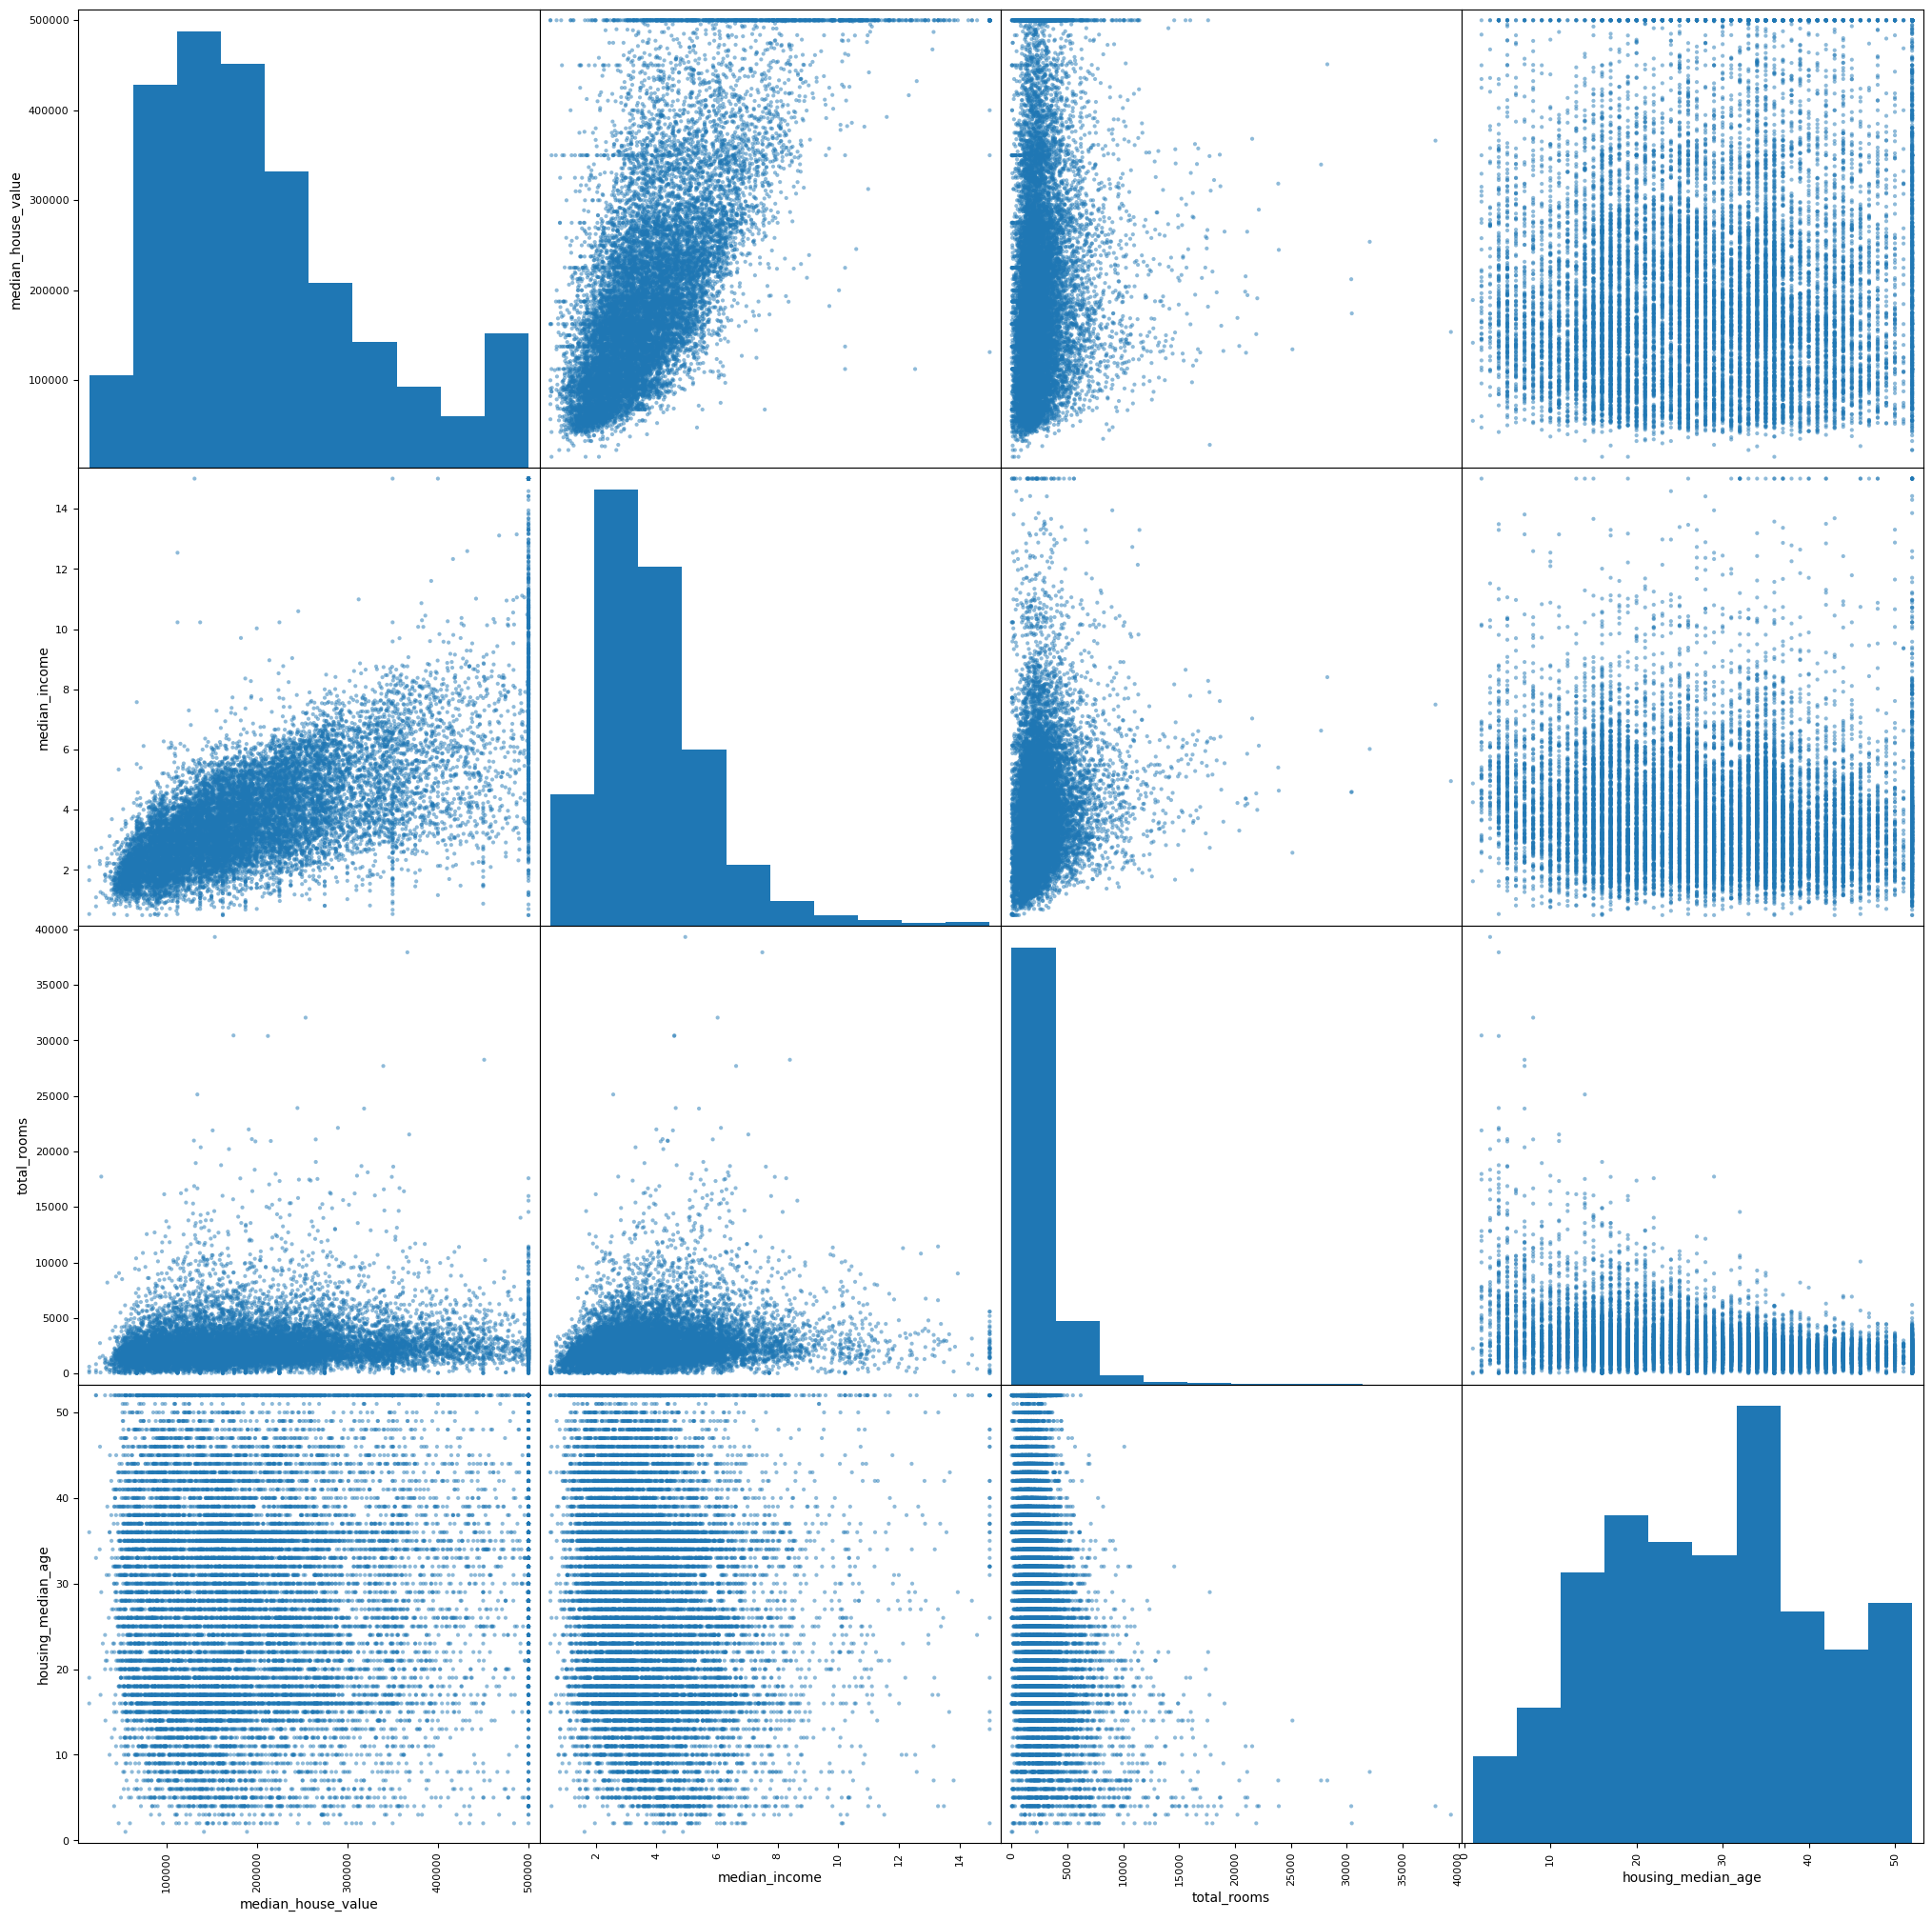

In [24]:
#let’s just focus on a few promising
#attributes that seem most correlated with the median housing value

from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing_data[attributes], figsize=(25, 25))
plt.show()

**The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot**

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

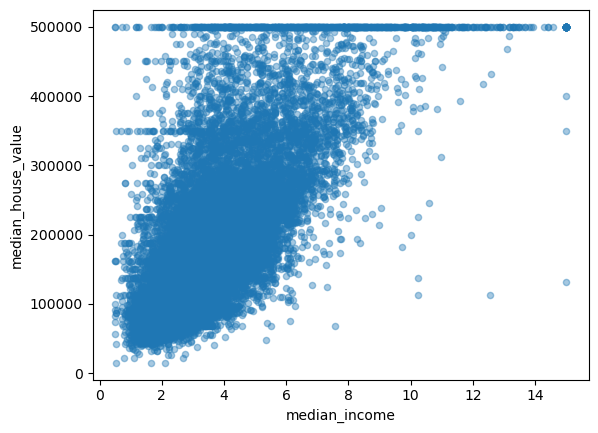

In [465]:
housing_data.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.4)


***This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend, and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at `$500,000`. But this
plot reveals other less obvious straight lines: a horizontal line around `$450,000`,
another around `$350,000`, perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.***

<h1>Experimenting with Attribute Combinations</h1>

***to try out various attribute combinations. For example, the total num‐
ber of rooms in a district is not very useful if you don’t know how many households
there are. What you really want is the number of rooms per household. Similarly, the
total number of bedrooms by itself is not very useful: you probably want to compare
it to the number of rooms. And the population per household also seems like an
interesting attribute combination***

In [466]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]

In [25]:
housing_data.sample(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16508    -121.10     37.80                35.0       1853.0           331.0   
8081     -118.19     33.81                21.0       1835.0           427.0   

       population  households  median_income  median_house_value  \
16508       958.0       340.0         3.3578            149000.0   
8081       1038.0       384.0         4.4559            198500.0   

      ocean_proximity  
16508          INLAND  
8081       NEAR OCEAN

In [468]:
corr_matrix = housing_data.corr() 
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

***The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.***

<h1>Prepare the Data for Machine Learning Algorithms</h1>

In [26]:
housing_data=strat_train_set.drop("median_house_value", axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

***Data Cleaning***



**not important features**
    
    housing_data.dropna(subset=["total_bedrooms"])  option 1
    
    housing_data.drop("total_bedrooms", axis=1)  option 2

**important features**

    median = housing_data["total_bedrooms"].median()  option 3
    
    housing_data["total_bedrooms"].fillna(median, inplace=True)

If we choose option 3, we should compute the median value on the training set and
use it to fill the missing values in the training set. we have to save the median
value that you have computed. we will need it later to replace missing values in the
test set when you want to evaluate your system

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")


In [29]:
no_ocean=housing_data.drop("ocean_proximity", axis=1)

In [30]:
imputer.fit(no_ocean)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable i.e imputer . Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [31]:
imputer.statistics_  # immuter method to show median 

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
no_ocean.median().values # normal method to compute median

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [33]:
X = imputer.transform(no_ocean)

In [34]:
# The result is a plain NumPy array containing the transformed features. If we want to
# put it back into a pandas DataFrame, it’s simple:
housing_tr = pd.DataFrame(X, columns=no_ocean.columns,index=no_ocean.index)

In [35]:
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  
12655      2237.0       706.0         2.1736  
15502      2015.0       768.0         6.3373  
2908        667.0       300.0         2.8750  
14053       898.0       483.0         2.2264  
20496      1837.0       580.0         4.4964  
...           ...         ...            ...  
15174      2026.0      1001.0         5.0900  
12661      4769.0      1418.0         2.8139  
19263       458.0       172.0         3.1797  
19140      1208.0       501.0         4.1964  
19773       625.0       197.0         3.1319  

[16512 rows x 8 columns]

In [37]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

**as we can see above there is no more missing values in total_bedroom**

***Handling Text and Categorical Attributes***

In [38]:
# In this dataset, there is just one: the ocean_proximity attribute

housing_cat = housing_data[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN
1481         NEAR BAY
18125       <1H OCEAN
5830        <1H OCEAN
17989       <1H OCEAN
4861        <1H OCEAN

***converting text into numbers***

In [39]:
# It’s not arbitrary text: there are a limited number of possible values, each of which
# represents a category. So this attribute is a categorical attribute. Most Machine Learning
# algorithms prefer to work with numbers, so let’s convert these categories from
# text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with above representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obvi
ously
not the case for the
column (for example, categories 0 and 4
ocean_proximity
are clearly more similar than categories 0 and 1)

***we can use one-hot encoding to solve above issue***

In [42]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
# Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very
# useful when you have categorical attributes with thousands of categories. After onehot
# encoding, we get a matrix with thousands of columns, and the matrix is full of 0s
# except for a single 1 per row. Using up tons of memory mostly to store zeros would
# be very wasteful, so instead a sparse matrix only stores the location of the nonzero
# elements. we can use it mostly like a normal 2D array,21 but if we really want to convert
# it to a (dense) NumPy array, we can call the toarray() method:

housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

***Custom transformers***

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X): # This method is also part of the Scikit-learn transformer interface.
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] # It performs the transformation of the input data X. It calculates rooms_per_household
        population_per_household = X[:, population_ix] / X[:, households_ix] # and population_per_household by dividing the corresponding columns of X. 
        if self.add_bedrooms_per_room:# If add_bedrooms_per_room is True, it also calculates bedrooms_per_room.
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        # The method then returns a new NumPy array (np.c_) that concatenates the 
        # original input X with the newly calculated features.
        
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_data.values)
    # This line creates an instance of the CombinedAttributesAdder 
    # class and assigns it to the variable attr_adder. The add_bedrooms_per_room parameter is set to False, 
    # indicating that the bedrooms_per_room feature should not be added during transformation.



In [47]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

***Also, housing_extra_attribs is a NumPy array, we've lost the column names (unfortunately, 
that's a problem with Scikit-Learn). To recover a DataFrame, we could run this:***

In [50]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing_data.columns)+["rooms_per_household", "population_per_household"],
    index=housing_data.index)
housing_extra_attribs.head()


longitude latitude housing_median_age total_rooms total_bedrooms  \
12655   -121.46    38.52               29.0      3873.0          797.0   
15502   -117.23    33.09                7.0      5320.0          855.0   
2908    -119.04    35.37               44.0      1618.0          310.0   
14053   -117.13    32.75               24.0      1877.0          519.0   
20496    -118.7    34.28               27.0      3536.0          646.0   

      population households median_income ocean_proximity rooms_per_household  \
12655     2237.0      706.0        2.1736          INLAND            5.485836   
15502     2015.0      768.0        6.3373      NEAR OCEAN            6.927083   
2908       667.0      300.0         2.875          INLAND            5.393333   
14053      898.0      483.0        2.2264      NEAR OCEAN            3.886128   
20496     1837.0      580.0        4.4964       <1H OCEAN            6.096552   

      population_per_household  
12655                 3.168555  
15502                 2.623698  
2908                  2.223333  
14053                 1.859213  
20496                 3.167241

<h1>Feature Scaling</h1>

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the hous
ing
data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.

***There are two common ways to get all attributes to have the same scale: `min-max
scaling` and `standardization`.***

***Transformation Pipelines***

In [52]:
# As we can see, there are many data transformation steps that need to be executed in
# the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with
# such sequences of transformations. Here is a small pipeline for the numerical
# attributes:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(no_ocean)

In [53]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

So far, we have handled the categorical columns and the numerical columns separately.
It would be more convenient to have a single transformer able to handle all columns,
applying the appropriate transformations to each column. In version 0.20,
Scikit-Learn introduced the
for this purpose, and the good news ColumnTransformer is that it works great with pandas DataFrames. 
Let’s use it to apply all the transformations to the housing data:

In [56]:
from sklearn.compose import ColumnTransformer
numerical_attribs = list(no_ocean)
categorial_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("numerical", num_pipeline, numerical_attribs), # this pipline is created above to transform numerical attributes
("category", OneHotEncoder(), categorial_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing_data)

In [57]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [58]:
housing_prepared.shape

(16512, 16)

<h1>Select and Train a Model</h1>

**i framed the problem, i got the data and explored it, i sampled a
training set and a test set, and i wrote transformation pipelines to clean up and
prepare my data for Machine Learning algorithms automatically.  now iam ready
to select and train a Machine Learning model.**

<h2>Training and Evaluating on the Training Set</h2>

***train a Linear Regression model***


In [59]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)



LinearRegression()

In [64]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)


In [66]:
Prediction = lin_reg.predict(X_test_prepared)
Mse = mean_squared_error(y_test, Prediction)
Rmse = np.sqrt(Mse)

In [68]:
Rmse

66913.4419132093

This is better than nothing, but clearly not a great score: most districts’ median_housing_values 
range between $120,000 and $265,000, so a typical prediction error of
$68,628 is not very satisfying. This is an example of a model underfitting the training
data.

the main ways to fix underfitting are to select a more
powerful model, to feed the training algorithm with better features, or to reduce the
constraints on the model. This model is not regularized, which rules out the last
option. we could try to add more features (e.g., the log of the population) and
try a more complex model to see how it does but as a part of this intership im constrained to  use Linear regression only